In [4]:
from pytube import YouTube, Stream, request
import scrapetube
import io

import imageio.v3 as iio
import time


In [4]:
videos = scrapetube.get_channel(channel_url="https://www.youtube.com/thedanechannel")

video_ids = []
for video in videos:
    video_ids.append(video['videoId'])
yt = YouTube('https://www.youtube.com/watch?v=' + video_ids[0])

In [21]:

yt = YouTube('https://www.youtube.com/watch?v=UtiOkC0s3hQ')

stream = yt.streams.filter(file_extension='mp4',res='360p',progressive='false').first()
buffy = io.BytesIO()

stream.stream_to_buffer(buffy)
frames = [frame for frame in iio.imiter(buffy, format_hint=".mp4")]
len(frames), stream.fps

C:\Users\David\AppData\Local\Programs\Python\Python38\lib\site-packages\imageio\core\request.py:267: UserWarning: The usage of `format_hint` is deprecated and will be removed in ImageIO v3. Use `extension` instead.
  warnings.warn(


(3500, 30)

In [11]:
class TimeArr():
    def __init__(self):
        self.timestamps = []
        self.labels = []
    
    def start(self):
        self.save("Start")

    def save(self, label=None):
        self.timestamps.append(time.time())
        self.labels.append(label if label is not None else len(self.timestamps))
    
    def report(self):
        for i in range(len(self.timestamps)):
            t = self.timestamps[i]
            t_prev = self.timestamps[i-1] if i > 0 else t
            print(f'{self.labels[i]} -> {t-t_prev}')

In [18]:
clock = TimeArr()

clock.start()
yt = YouTube('https://www.youtube.com/watch?v=-BGMI34rAl8')
clock.save("yt")

stream = yt.streams.filter(file_extension='mp4',res='360p',progressive='false').first()
clock.save("yt stream")

buffy = io.BytesIO()
stream.stream_to_buffer(buffy)
clock.save("to_buffer")

frames = [frame for frame in iio.imiter(buffy, format_hint=".mp4")]
clock.save("read_frames")

for i in range(0,len(frames)-1,int(stream.fps)):
    frame = iio.imread(
        buffy,
        index=i,
        format_hint='.mp4'
    )
clock.save("indx frames")

clock.report()
len(frames), stream.fps

Start -> 0.0
yt -> 0.0
yt stream -> 1.263817310333252
to_buffer -> 0.600736141204834
read_frames -> 0.2457120418548584
indx frames -> 1.8976950645446777


(391, 30)

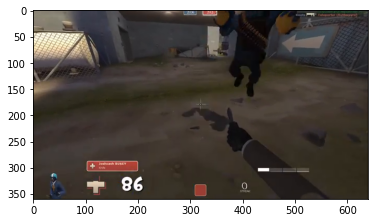

In [20]:
import cv2
import matplotlib.pyplot as plt
plt.imshow(frames[243])